# Problem Statement
For given data Attributes we will identify
Class Values:
unacc, acc, good, vgood


Attributes:

buying: vhigh, high, med, low.

maint: vhigh, high, med, low.

doors: 2, 3, 4, 5more.

persons: 2, 4, more.

lug_boot: small, med, big.

safety: low, med, high.

# Step 1: Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Main model library
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, linear_model
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load data 

In [2]:
car_df = pd.read_csv('car.data', names= ['buying','maint','door','persons','lug_boot','safety','class'])

In [3]:
car_df = shuffle(car_df)

In [4]:
car_df

,buying,maint,door,persons,lug_boot,safety,class
9,vhigh,vhigh,2,4,small,low,unacc
1315,low,vhigh,2,more,small,med,unacc
1192,med,low,2,2,med,med,unacc
581,high,high,3,4,med,high,acc
558,high,high,2,more,small,low,unacc
...,...,...,...,...,...,...,...
1507,low,high,5more,more,med,med,acc
237,vhigh,med,2,more,med,low,unacc
1627,low,low,2,2,big,med,unacc
886,med,vhigh,2,more,med,med,unacc


In [5]:
car_df.dtypes

buying      object
maint       object
door        object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

##### Since all freature have data type as object ,In order to train K Nearest Neighbour data must be preprocessed to  model-understandable numerical data( using Label Encoder)

In [6]:
list(car_df.columns.values.tolist())

['buying', 'maint', 'door', 'persons', 'lug_boot', 'safety', 'class']

### visualize class data 

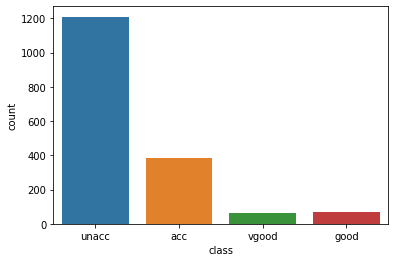

In [7]:
sns.countplot(car_df['class'])

In [8]:
car_df.groupby('class').describe()

buying                    maint                     door         ...  \
       count unique    top freq count unique    top freq count unique  ...   
class                                                                  ...   
acc      384      4    med  115   384      4    med  115   384      4  ...   
good      69      2    low   46    69      2    low   46    69      4  ...   
unacc   1210      4  vhigh  360  1210      4  vhigh  360  1210      4  ...   
vgood     65      2    low   39    65      3    low   26    65      4  ...   

      persons      lug_boot                    safety                    
          top freq    count unique    top freq  count unique   top freq  
class                                                                    
acc         4  198      384      3    big  144    384      2  high  204  
good        4   36       69      3    big   24     69      2   med   39  
unacc       2  576     1210      3  small  450   1210      3   low  576  
vgood    more   35       65      2    big   40     65      1  high   65  

[4 rows x 24 columns]

# Step 3: Data Prepration 

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [10]:
labelEncoder = LabelEncoder()

In [11]:
car_df['buying'] = labelEncoder.fit_transform(car_df['buying']) 
car_df['maint'] = labelEncoder.fit_transform(car_df['maint']) 
car_df['door'] = labelEncoder.fit_transform(car_df['door']) 
car_df['persons'] = labelEncoder.fit_transform(car_df['persons']) 
car_df['lug_boot'] = labelEncoder.fit_transform(car_df['lug_boot'])
car_df['safety'] = labelEncoder.fit_transform(car_df['safety']) 
car_df['class'] = labelEncoder.fit_transform(car_df['class']) 

In [12]:
car_df.columns

Index(['buying', 'maint', 'door', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [13]:
car_df

,buying,maint,door,persons,lug_boot,safety,class
9,3,3,0,1,2,1,2
1315,1,3,0,2,2,2,2
1192,2,1,0,0,1,2,2
581,0,0,1,1,1,0,0
558,0,0,0,2,2,1,2
...,...,...,...,...,...,...,...
1507,1,0,3,2,1,2,0
237,3,2,0,2,1,1,2
1627,1,1,0,0,0,2,2
886,2,3,0,2,1,2,2


In [14]:
X = car_df.drop('class', axis =1)

In [15]:
X.shape

(1728, 6)

In [16]:
y = car_df['class']

In [17]:
y

9       2
1315    2
1192    2
581     0
558     2
       ..
1507    0
237     2
1627    2
886     2
1403    0
Name: class, Length: 1728, dtype: int32

In [18]:
y.shape

(1728,)

In [19]:
# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')

# dataset = np.array(columnTransformer.fit_transform(car_df), dtype = np.str)

# dataset

In [20]:
X_train, X_test, y_train ,y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [21]:
X_train.shape

(1555, 6)

In [22]:
y_train.shape

(1555,)

# Step 4: Training model 

In [23]:
knn_model = KNeighborsClassifier(n_neighbors= 9)

In [24]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [25]:
accuracy = knn_model.score(X_test, y_test)
accuracy

0.9595375722543352

# Step 5: Predicting result 

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report

In [27]:
predict_test = knn_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predict_test)
print(accuracy)

0.9595375722543352


In [28]:
true = labelEncoder.inverse_transform(y_test)

In [29]:
predict = labelEncoder.inverse_transform(predict_test)

In [30]:
compare = pd.DataFrame(data= np.c_[true ,predict],
                     columns= ['True test', 'Predict test'])

In [31]:
compare

,True test,Predict test
0,unacc,unacc
1,unacc,unacc
2,acc,unacc
3,acc,acc
4,unacc,unacc
...,...,...
168,acc,acc
169,unacc,unacc
170,unacc,unacc
171,unacc,unacc


In [32]:
compare[compare['True test'] != compare['Predict test']]

,True test,Predict test
2,acc,unacc
14,good,acc
29,vgood,good
53,unacc,acc
67,acc,unacc
79,acc,unacc
124,acc,unacc


##### finding k neighbours of X_test data

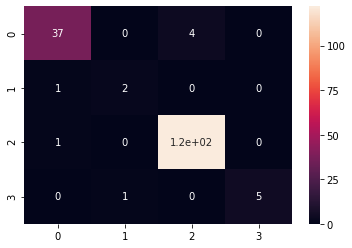

In [33]:
cm =  confusion_matrix(y_test, predict_test)
sns.heatmap(cm, annot= True)

In [34]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        41
           1       0.67      0.67      0.67         3
           2       0.97      0.99      0.98       123
           3       1.00      0.83      0.91         6

    accuracy                           0.96       173
   macro avg       0.90      0.85      0.87       173
weighted avg       0.96      0.96      0.96       173

